In [43]:
# Import the needed libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [44]:
# Read in Salaries data to show the histogram of the range differences
salaries = pd.read_csv('core/Salaries.csv')
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


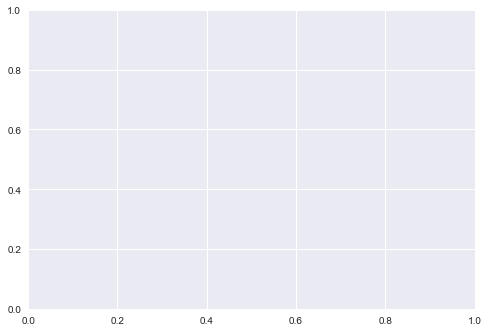

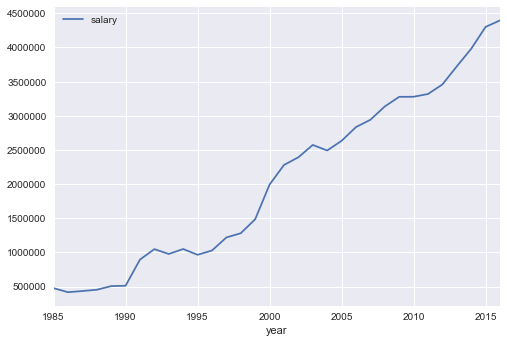

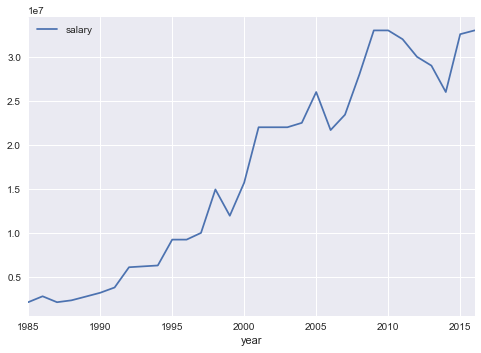

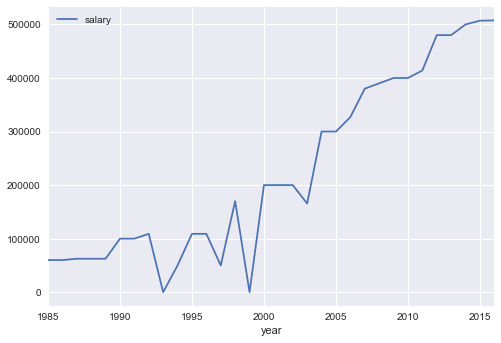

In [45]:
# Extract the salary and yearID
salary = salaries['salary']
year_id = salaries['yearID']

# group the salaries by year to find the difference between the average and the max
mean_yearly_salaries = salaries.groupby('yearID', as_index=False).mean()
min_yearly_salaries = salaries.groupby('yearID', as_index=False).min()
max_yearly_salaries = salaries.groupby('yearID', as_index=False).max()
# print("The average salaries for each year is: ", mean_yearly_salaries)
# print("The maximum salaries earned by a player for each year is: ", max_yearly_salaries)

###########################################
#   Plot of the average salaries per year #
###########################################
mean_salary_and_year = pd.DataFrame({'year': mean_yearly_salaries['yearID'],
                                    'salary': mean_yearly_salaries['salary'].values})
mean_salary_and_year.reset_index().plot(x='year', y='salary')

###########################################
#   Plot of the highest earners per year  #
###########################################
max_salary_and_year = pd.DataFrame({'year': max_yearly_salaries['yearID'],
                                    'salary': max_yearly_salaries['salary'].values})
max_salary_and_year.reset_index().plot(x='year', y='salary')

###########################################
#   Plot of the least earners per year  #
###########################################
min_salary_and_year = pd.DataFrame({'year': min_yearly_salaries['yearID'],
                                    'salary': min_yearly_salaries['salary'].values})
min_salary_and_year.reset_index().plot(x='year', y='salary')

plt.show()

In [46]:
# taking a look at the teams
teams = pd.read_csv('core/Teams.csv')
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.838,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.814,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.839,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [47]:
since_1990 = teams.loc[teams.yearID > 1990, ['teamID', 'yearID', 'lgID', 'G', 'W', 'L', 'R', 'RA']]
since_1990.head()

,teamID,yearID,lgID,G,W,L,R,RA
2073,ATL,1991,NL,162,94,68,749,644
2074,BAL,1991,AL,162,67,95,686,796
2075,BOS,1991,AL,162,84,78,731,712
2076,CAL,1991,AL,162,81,81,653,649
2077,CHA,1991,AL,162,87,75,758,681


In [48]:
since_1990 = since_1990.assign(RD=since_1990.R - since_1990.RA, win_percent = since_1990.W/(since_1990.W + since_1990.L))
since_1990.head()

,teamID,yearID,lgID,G,W,L,R,RA,RD,win_percent
2073,ATL,1991,NL,162,94,68,749,644,105,0.580247
2074,BAL,1991,AL,162,67,95,686,796,-110,0.413580
2075,BOS,1991,AL,162,84,78,731,712,19,0.518519
2076,CAL,1991,AL,162,81,81,653,649,4,0.500000
2077,CHA,1991,AL,162,87,75,758,681,77,0.537037


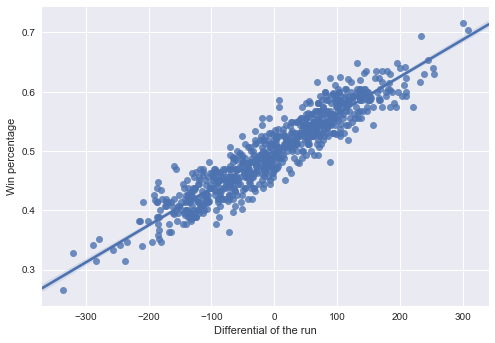

In [49]:
axes = sns.regplot(since_1990.RD, since_1990.win_percent)
axes.set_xlabel("Differential of the run")
axes.set_ylabel("Win percentage")
plt.show()

In [50]:
# group for each team and the year
sumSalariesDF = salaries.groupby(['teamID','yearID']).sum()
sumSalariesDF.head()

salary
teamID yearID          
ANA    1997    31135472
       1998    41281000
       1999    55388166
       2000    51464167
       2001    47535167

In [51]:
teamsSelectionDF = teams.loc[:,['yearID', 'teamID', 'W']]
teamsSelectionDF.head()

,yearID,teamID,W
0,1871,BS1,20
1,1871,CH1,19
2,1871,CL1,10
3,1871,FW1,7
4,1871,NY2,16


In [52]:
salariesSelectionDF = salaries.loc[:,['yearID', 'teamID', 'salary']]
salariesSelectionDF.head()

,yearID,teamID,salary
0,1985,ATL,870000
1,1985,ATL,550000
2,1985,ATL,545000
3,1985,ATL,633333
4,1985,ATL,625000


In [53]:
salariesSummed = salariesSelectionDF.groupby(['teamID', 'yearID']).sum()
salariesSummed.head()

salary
teamID yearID          
ANA    1997    31135472
       1998    41281000
       1999    55388166
       2000    51464167
       2001    47535167

In [54]:
salariesSummed = salariesSummed.reset_index()
salariesSummed.head()

,teamID,yearID,salary
0,ANA,1997,31135472
1,ANA,1998,41281000
2,ANA,1999,55388166
3,ANA,2000,51464167
4,ANA,2001,47535167


In [55]:
merged_team_and_salaries = pd.merge(teamsSelectionDF, salariesSummed, on=['yearID', 'teamID'], how='inner')
merged_team_and_salaries.head()

,yearID,teamID,W,salary
0,1985,ATL,66,14807000
1,1985,BAL,83,11560712
2,1985,BOS,81,10897560
3,1985,CAL,90,14427894
4,1985,CHA,85,9846178


In [56]:
merged_team_and_salaries = merged_team_and_salaries.groupby(['teamID', 'yearID']).sum()
merged_team_and_salaries = merged_team_and_salaries.reset_index()
merged_team_and_salaries.head()

,teamID,yearID,W,salary
0,ANA,1997,84,31135472
1,ANA,1998,85,41281000
2,ANA,1999,70,55388166
3,ANA,2000,82,51464167
4,ANA,2001,75,47535167


In [57]:
grouped_yr_99= merged_team_and_salaries[merged_team_and_salaries.yearID==1999]
wins_99 = grouped_yr_99[ 'W']
salaries_99 = grouped_yr_99[ 'salary']
teams_99 = grouped_yr_99[ 'teamID']

In [58]:
def plotYear(year):
    grouped_year = merged_team_and_salaries[merged_team_and_salaries.yearID==year]
    salaries_year = grouped_year['salary'].values
    wins_year = grouped_year['W'].values
    teams_year = grouped_year['teamID'].values  
      
    X = np.divide(salaries_year, 10)
    Y = wins_year
    colors = ['r' if team=='OAK' else 'b' for team in teams_year]
   
    plt.scatter(X,Y, c=colors, s=150, alpha=0.6, edgecolors='none')        
    plt.title('win/salaries in '+str(year)+' (red=OAK)')    
    plt.xlabel('tot salaries (M$)')
    plt.ylabel('wins')

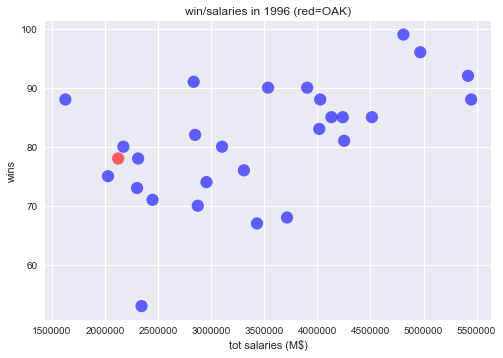

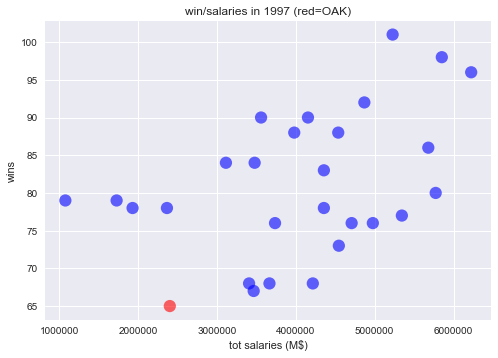

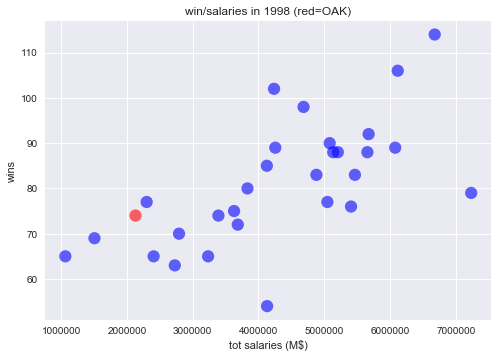

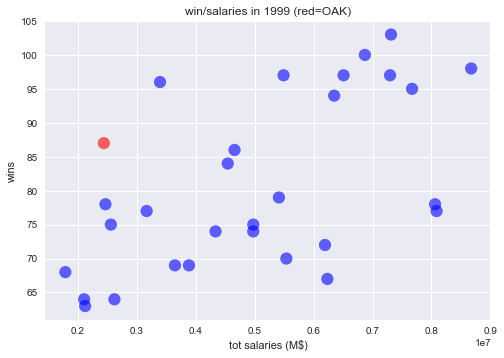

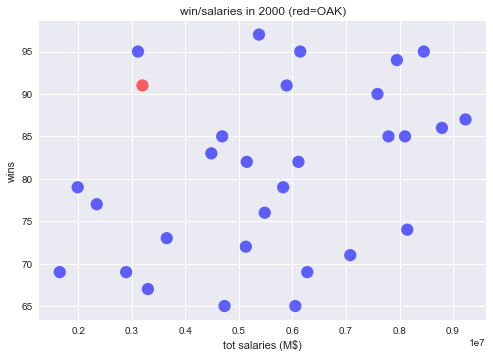

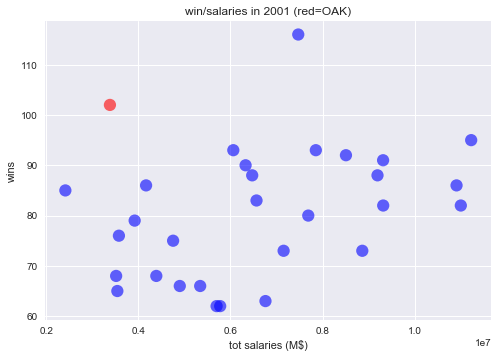

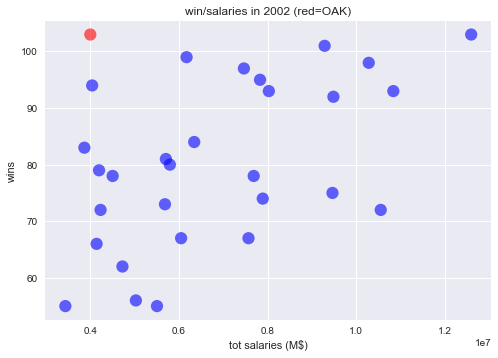

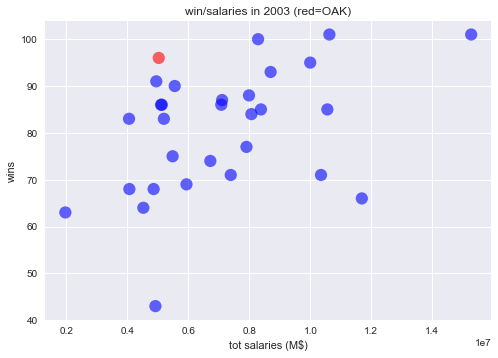

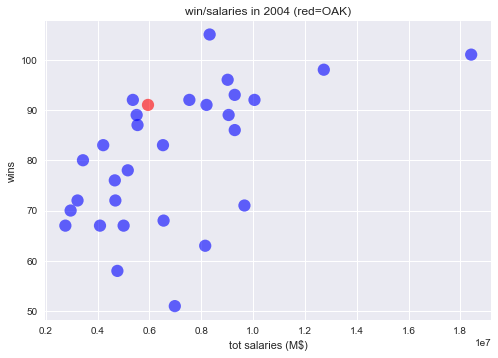

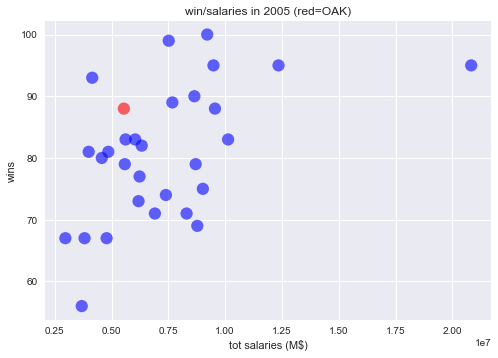

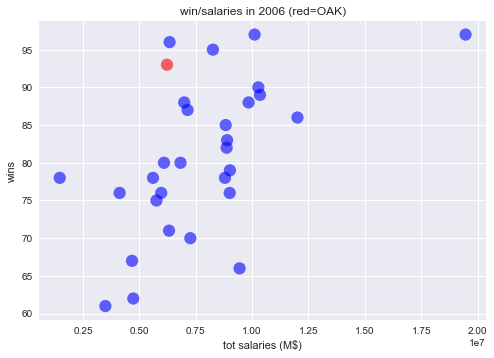

In [59]:
for year in range(1996,2007):
    plotYear(year)
    plt.figure()
plt.show()

In [60]:
grouped_OAK = merged_team_and_salaries[merged_team_and_salaries.teamID=='OAK']
years = grouped_OAK.loc[:,[ 'yearID']].values
wins = grouped_OAK.loc[:,[ 'W']].values
salaries = grouped_OAK.loc[:,[ 'salary']].values

In [61]:
from sklearn import linear_model

linReg = linear_model.LinearRegression()
linReg.fit(salaries, wins)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

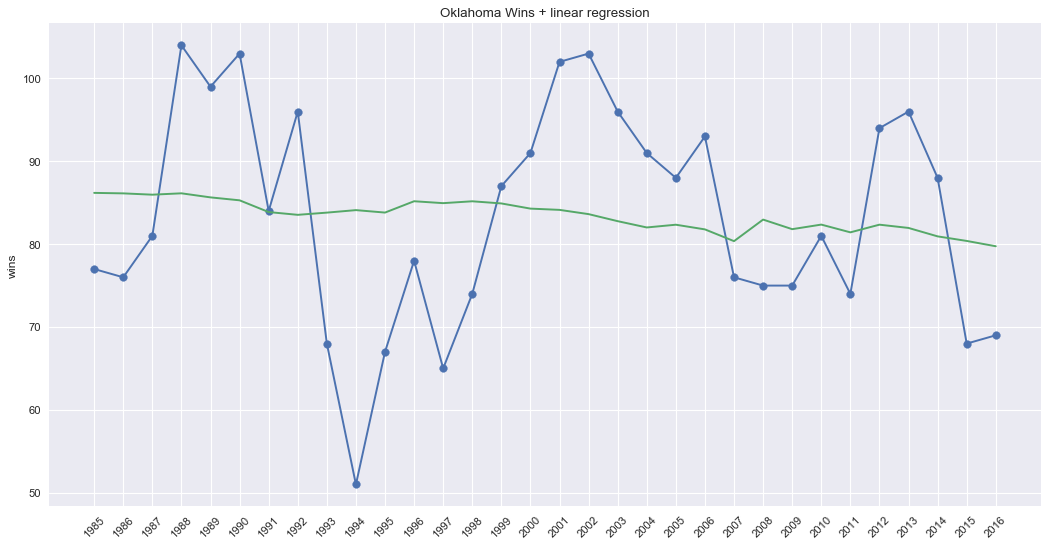

In [62]:
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(years, wins)
plt.plot(years, wins)
plt.plot(years, linReg.predict(salaries))

plt.xticks(years, [year[0] for year in years], rotation=45)
plt.title('Oklahoma Wins + linear regression')
plt.ylabel('wins')
plt.grid(True)
plt.show()

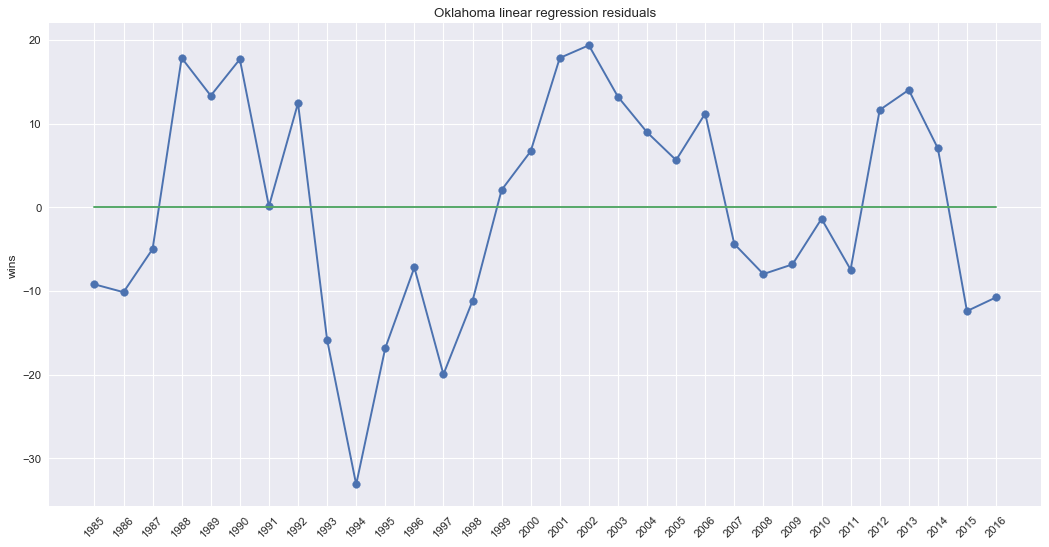

In [63]:
plt.figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')

predictions = linReg.predict(salaries)
errors = wins - predictions

plt.scatter(years, errors)
plt.plot(years, errors)
plt.plot(years, [0 for x in range(len(years))])

plt.xticks(years, [year[0] for year in years], rotation=45)
plt.title('Oklahoma linear regression residuals')
plt.ylabel('wins')
plt.grid(True)
plt.show()

In [64]:
import scipy as sp
from matplotlib.ticker import FuncFormatter

In [83]:
# Subset of the data starting from 1960, with 15 Attributes only. For the remaining of this tutorial 
# I will use only this subset and throw the rest of the data.
teams = pd.read_csv('core/Teams.csv')
teams = teams[teams['yearID'] >= 1960]
teams = teams[['yearID', 'teamID', 'Rank', 'R', 'RA', 'G', 'W', 'H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B']]

In [84]:
# setting the indexes to year and team since queries will be made based on that which makes things faster
teams = teams.set_index(['yearID', 'teamID'])

In [85]:
salaries = pd.read_csv('core/Salaries.csv')
salaries_by_yearID_teamID = salaries.groupby(['yearID', 'teamID'])['salary'].sum()
teams = teams.join(salaries_by_yearID_teamID)

In [90]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

def plot_spending_wins(teams, year):    
    teams_year = teams.xs(year)
    fig, ax = plt.subplots()
    for i in teams_year.index:
        if i == 'OAK':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#4DDB94", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#4DDB94"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'NYA':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#0099FF", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#0099FF"),
                        xytext=(30, -30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'BOS':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#FF6666", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#FF6666"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))     
        else:
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="grey", s=200)
    ax.xaxis.set_major_formatter(formatter) 
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlabel('Salaries', fontsize=20)
    ax.set_ylabel('Number of Wins' , fontsize=20)
    ax.set_title('Salaries - Wins: '+ str(year), fontsize=25, fontweight='bold')
    plt.show()


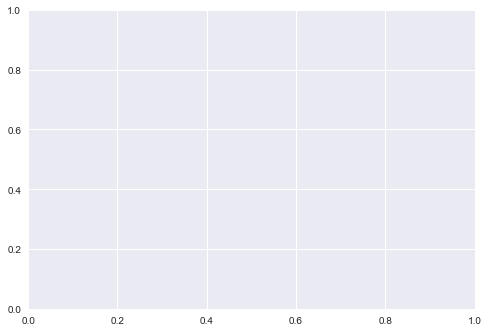

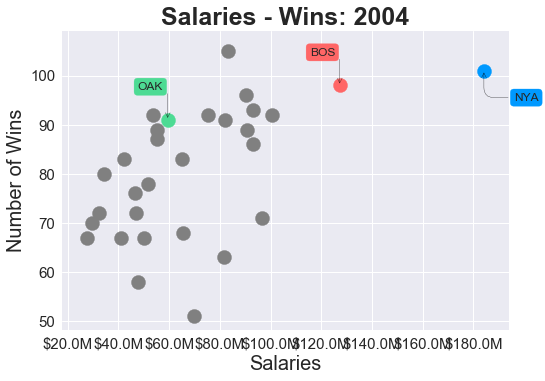

In [91]:
plot_spending_wins(teams, 2004)

In [92]:
teams['BA'] = teams['H']/teams['AB']
teams['OBP'] = (teams['H'] + teams['BB'] + teams['HBP']) / (teams['AB'] + teams['BB'] + teams['HBP'] + teams['SF'])
teams['SLG'] = (teams['H'] + teams['2B'] + (2*teams['3B']) + (3*teams['HR'])) / teams['AB']

In [93]:
import statsmodels.formula.api as sm

In [94]:
#First Model
runs_reg_model1 = sm.ols("R~OBP+SLG+BA",teams)
runs_reg1 = runs_reg_model1.fit()
#Second Model
runs_reg_model2 = sm.ols("R~OBP+SLG",teams)
runs_reg2 = runs_reg_model2.fit()
#Third Model
runs_reg_model3 = sm.ols("R~BA",teams)
runs_reg3 = runs_reg_model3.fit()

In [95]:
runs_reg1.summary()
runs_reg2.summary()
runs_reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     1629.
Date:                Sun, 17 Sep 2017   Prob (F-statistic):          2.98e-241
Time:                        20:37:36   Log-Likelihood:                -8416.4
No. Observations:                1492   AIC:                         1.684e+04
Df Residuals:                    1490   BIC:                         1.685e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -722.3761     35.335    -20.444      0.000    -791.688    -653.064
BA          5503.6438    136.375     40.357      0.000    5236.136    5771.151
==============================================================================
Omnibus:                      385.951   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1312.329
Skew:                          -1.252   Prob(JB):                    1.08e-285
Kurtosis:                       6.852   Cond. No.                         82.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""